In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import mglearn

# Data Cleaning and Exploration 

In [2]:
credit=pd.read_csv("creditcard.csv")

In [263]:
credit.describe()

,AGE,PAY_SEPT05,PAY_AUG05,PAY_JULY05,PAY_JUNE05,PAY_MAY05,PAY_APRIL05,BILL_AMT_SEPT05,BILL_AMT_AUG05,BILL_AMT_JULY05,BILL_AMT_JUNE05,BILL_AMT_MAY05,BILL_AMT_APRIL05,PAY_AMT_SEPT05,PAY_AMT_AUG05,PAY_AMT_JULY05,PAY_AMT_JUNE05,PAY_AMT_MAY05,PAY_AMT_APRIL05,default_payment
count,21000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,28500.000000,30000.000000,28200.000000,30000.000000,30000.000000
mean,35.450667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5203.669649,4826.076867,4818.994894,5215.502567,0.221200
std,9.230436,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17395.471649,15666.159744,15293.753654,17777.465775,0.415062
min,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.000000,296.000000,250.000000,117.750000,0.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4500.000000,4013.250000,4087.750000,4000.000000,0.000000
max,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [265]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEX               24300 non-null  object 
 1   EDUCATION         27000 non-null  object 
 2   MARRIAGE          30000 non-null  object 
 3   AGE               21000 non-null  float64
 4   PAY_SEPT05        30000 non-null  int64  
 5   PAY_AUG05         30000 non-null  int64  
 6   PAY_JULY05        30000 non-null  int64  
 7   PAY_JUNE05        30000 non-null  int64  
 8   PAY_MAY05         30000 non-null  int64  
 9   PAY_APRIL05       30000 non-null  int64  
 10  BILL_AMT_SEPT05   30000 non-null  int64  
 11  BILL_AMT_AUG05    30000 non-null  int64  
 12  BILL_AMT_JULY05   30000 non-null  int64  
 13  BILL_AMT_JUNE05   30000 non-null  int64  
 14  BILL_AMT_MAY05    30000 non-null  int64  
 15  BILL_AMT_APRIL05  30000 non-null  int64  
 16  PAY_AMT_SEPT05    30000 non-null  int64 

In [266]:
# Checking shape of data
credit.shape

(30000, 23)

In [267]:
# Checking proportion of 1s and 0s in target column i.e. default_payment
print("Proportion of 1s {:.4f}".format(((credit.default_payment == 1).sum())/len(credit)))
print("Proportion of 0s {:.4f}".format(((credit.default_payment == 0).sum())/len(credit)))

Proportion of 1s 0.2212
Proportion of 0s 0.7788


In [268]:
# Checking for NA values
credit.isna().sum()

SEX                 5700
EDUCATION           3000
MARRIAGE               0
AGE                 9000
PAY_SEPT05             0
PAY_AUG05              0
PAY_JULY05             0
PAY_JUNE05             0
PAY_MAY05              0
PAY_APRIL05            0
BILL_AMT_SEPT05        0
BILL_AMT_AUG05         0
BILL_AMT_JULY05        0
BILL_AMT_JUNE05        0
BILL_AMT_MAY05         0
BILL_AMT_APRIL05       0
PAY_AMT_SEPT05         0
PAY_AMT_AUG05          0
PAY_AMT_JULY05      1500
PAY_AMT_JUNE05         0
PAY_AMT_MAY05       1800
PAY_AMT_APRIL05        0
default_payment        0
dtype: int64

In [269]:
# Checking column-wise percentage of NA values
credit.isna().sum()/len(credit)*100

SEX                 19.0
EDUCATION           10.0
MARRIAGE             0.0
AGE                 30.0
PAY_SEPT05           0.0
PAY_AUG05            0.0
PAY_JULY05           0.0
PAY_JUNE05           0.0
PAY_MAY05            0.0
PAY_APRIL05          0.0
BILL_AMT_SEPT05      0.0
BILL_AMT_AUG05       0.0
BILL_AMT_JULY05      0.0
BILL_AMT_JUNE05      0.0
BILL_AMT_MAY05       0.0
BILL_AMT_APRIL05     0.0
PAY_AMT_SEPT05       0.0
PAY_AMT_AUG05        0.0
PAY_AMT_JULY05       5.0
PAY_AMT_JUNE05       0.0
PAY_AMT_MAY05        6.0
PAY_AMT_APRIL05      0.0
default_payment      0.0
dtype: float64

#### We observe that SEX, EDUCATION, AGE, PAY_AMT3_JULY05, PAY_AMT5_MAY05 contain NA values

#### column: SEX 

In [3]:
credit['SEX'].unique()

array([nan, 'Female', 'Male'], dtype=object)

In [4]:
# SEX column contains two values (apart from NA values) - 'Male', 'Female'
# We will replace this column with binary data
# We will assign 1 - 'Female' and 0 - 'Male'

credit['SEX'] = credit['SEX'].replace(['Male','Female'], value=[0,1])

In [5]:
credit['SEX'].unique()

array([nan,  1.,  0.])

In [6]:
# We will replace NA values of this column with mode of this column 
credit['SEX']= credit['SEX'].fillna(credit['SEX'].mode()[0])
credit['SEX'] = credit['SEX'].astype(int)
credit['SEX'].isna().any()

False

#### column: AGE  

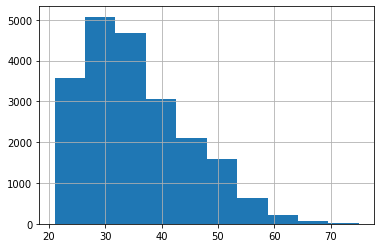

In [7]:
# Plotting histogram of age
credit['AGE'].hist()

In [8]:
# We will replace NA values of this column with median of this column 
credit['AGE']= credit['AGE'].fillna(credit['AGE'].median())
credit['AGE'] = credit['AGE'].astype(int)
credit['AGE'].isna().any()

False

#### column: EDUCATION 

In [9]:
credit['EDUCATION'].unique()

array(['University', 'Graduate School', nan, 'High School', 'Uneducated'],
      dtype=object)

In [10]:
# EDUCATION column contains four values (apart from NA values) - 'University', 'Graduate School', 'High School'
# and 'Uneducated'
# We will replace this column with ordinal values
# Uneducated - 0
# High School - 1
# University - 2
# Graduate School - 3

credit['EDUCATION'] = credit['EDUCATION'].replace(['Uneducated','High School','University', 'Graduate School'], value=[0,1,2,3])

In [11]:
credit['EDUCATION'].unique()

array([ 2.,  3., nan,  1.,  0.])

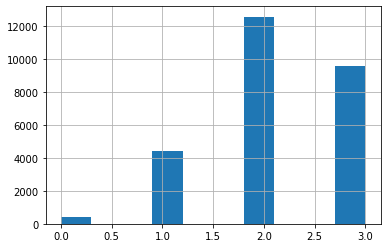

In [12]:
# Plotting histogram of education
credit['EDUCATION'].hist()

In [13]:
# We will replace NA values of this column with mode of this column 
credit['EDUCATION']= credit['EDUCATION'].fillna(credit['EDUCATION'].mode()[0])
credit['EDUCATION'] = credit['EDUCATION'].astype(int)
credit['EDUCATION'].isna().any()

False

#### column: MARRIAGE  

In [14]:
credit['MARRIAGE'].unique()

array(['Married', 'Single', 'Others'], dtype=object)

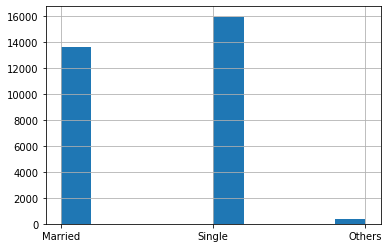

In [15]:
# Plotting histogram of education
credit['MARRIAGE'].hist()

In [16]:
# There are 3 unique values in this column, we will convert this column to one-hot vector
marr = pd.get_dummies(credit['MARRIAGE'],columns='MARRIAGE',prefix='MaritalStatus')
credit = pd.concat([credit, marr], axis=1)
credit = credit.drop(['MARRIAGE'],axis=1)

In [17]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SEX                    30000 non-null  int64  
 1   EDUCATION              30000 non-null  int64  
 2   AGE                    30000 non-null  int64  
 3   PAY_SEPT05             30000 non-null  int64  
 4   PAY_AUG05              30000 non-null  int64  
 5   PAY_JULY05             30000 non-null  int64  
 6   PAY_JUNE05             30000 non-null  int64  
 7   PAY_MAY05              30000 non-null  int64  
 8   PAY_APRIL05            30000 non-null  int64  
 9   BILL_AMT_SEPT05        30000 non-null  int64  
 10  BILL_AMT_AUG05         30000 non-null  int64  
 11  BILL_AMT_JULY05        30000 non-null  int64  
 12  BILL_AMT_JUNE05        30000 non-null  int64  
 13  BILL_AMT_MAY05         30000 non-null  int64  
 14  BILL_AMT_APRIL05       30000 non-null  int64  
 15  PA

#### column: PAY_AMT_JULY05  

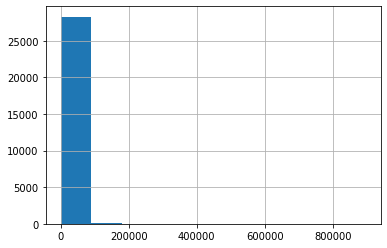

In [18]:
# Plotting histogram of PAY_AMT_JULY05 
credit['PAY_AMT_JULY05'].hist(bins=10)

In [19]:
# The data in this column is dependent on data in BILL_AMT_JULY05
# If bill amount in July 2005 is 0 then payment amount is 0 as well.
# Payment amount cannot exceed bill amount hence we impute this column using the values in BILL_AMT_JULY05 column 
credit['PAY_AMT_JULY05']= credit['PAY_AMT_JULY05'].fillna(credit['BILL_AMT_JULY05'])

In [20]:
credit['PAY_AMT_JULY05'] = credit['PAY_AMT_JULY05'].astype(int)
credit['PAY_AMT_JULY05'].isna().any()

False

#### column: PAY_AMT_MAY05  

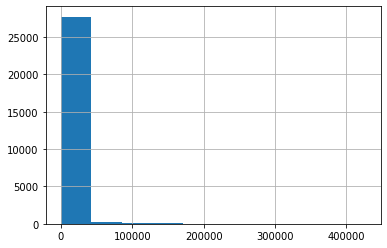

In [21]:
# Plotting histogram of PAY_AMT_MAY05
credit['PAY_AMT_MAY05'].hist(bins=10)

In [22]:
# The data in this column is dependent on data in BILL_AMT_MAYY05
# If bill amount in May 2005 is 0 then payment amount is 0 as well.
# Payment amount cannot exceed bill amount hence we impute this column using the values in BILL_AMT_MAY05 column 
credit['PAY_AMT_MAY05']= credit['PAY_AMT_MAY05'].fillna(credit['BILL_AMT_MAY05'])

In [23]:
credit['PAY_AMT_MAY05'] = credit['PAY_AMT_MAY05'].astype(int)
credit['PAY_AMT_MAY05'].isna().any()

False

In [24]:
# Checking data after imputation
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   SEX                    30000 non-null  int64
 1   EDUCATION              30000 non-null  int64
 2   AGE                    30000 non-null  int64
 3   PAY_SEPT05             30000 non-null  int64
 4   PAY_AUG05              30000 non-null  int64
 5   PAY_JULY05             30000 non-null  int64
 6   PAY_JUNE05             30000 non-null  int64
 7   PAY_MAY05              30000 non-null  int64
 8   PAY_APRIL05            30000 non-null  int64
 9   BILL_AMT_SEPT05        30000 non-null  int64
 10  BILL_AMT_AUG05         30000 non-null  int64
 11  BILL_AMT_JULY05        30000 non-null  int64
 12  BILL_AMT_JUNE05        30000 non-null  int64
 13  BILL_AMT_MAY05         30000 non-null  int64
 14  BILL_AMT_APRIL05       30000 non-null  int64
 15  PAY_AMT_SEPT05         30000 non-nul

In [25]:
credit.shape

(30000, 25)

# Classification Models 

In [26]:
X = credit.loc[:,credit.columns != 'default_payment']
y = credit['default_payment']

In [27]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## KNN Classification 

In [201]:
param_grid = {'n_neighbors': [3,5,7,9,11],
              'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [202]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [203]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.81


In [204]:
print("Best train score: {:.4f}".format(grid_search_knn.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_knn.score(X_test,y_test)))

Best train score: 0.8262
Best test score: 0.8079


### Evaluation of Model

#### Confusion Matrix 

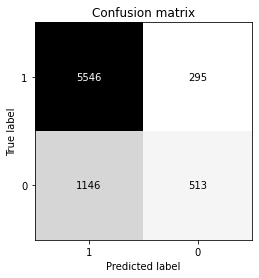

In [254]:
%matplotlib inline
knnPred = grid_search_knn.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, knnPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=0.363636


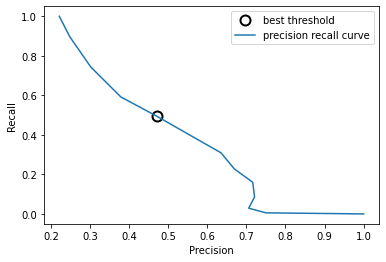

In [167]:
%matplotlib inline

knn_prob = grid_search_knn.predict_proba(X_test)
knn_prob = knn_prob[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, knn_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))


plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

#### ROC Curve

Best Threshold=0.363636


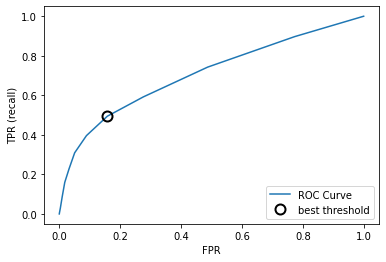

In [169]:
%matplotlib inline

knn_prob = grid_search_knn.predict_proba(X_test)
knn_prob = knn_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, knn_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [209]:
print("f1 score K Neighbors Classifier: {:.4f}".format(f1_score(y_test, knnPred)))

f1 score K Neighbors Classifier: 0.4159


#### ROC_AUC Score

In [208]:
knn_prob = grid_search_knn.predict_proba(X_test)
knn_prob = knn_prob[:,1]
rascore_knn = roc_auc_score(y_test, knn_prob)
print("ROC_AUC Score for K Neighbors Classifier: {:.4f}".format(rascore_knn))

ROC_AUC Score for K Neighbors Classifier: 0.7079


## Logistic Regression

In [149]:
param_grid = {'C': [0.01,.1,1,10,100],
              'penalty': ['l1','l2']}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [150]:
grid_search_logistic.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True)

In [151]:
print("Best parameters: {}".format(grid_search_logistic.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logistic.best_score_))

Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.81


In [152]:
print("Best train score: {:.4f}".format(grid_search_logistic.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_logistic.score(X_test,y_test)))

Best train score: 0.8108
Best test score: 0.8099


### Evaluation of Model

#### Confusion Matrix 

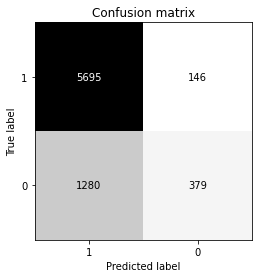

In [253]:
%matplotlib inline
logRegPred = grid_search_logistic.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, logRegPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=0.266620


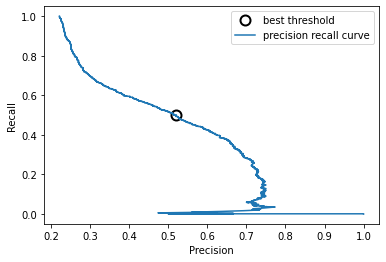

In [170]:
%matplotlib inline

lr_prob = grid_search_logistic.predict_proba(X_test)
lr_prob = lr_prob[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, lr_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=0.256755


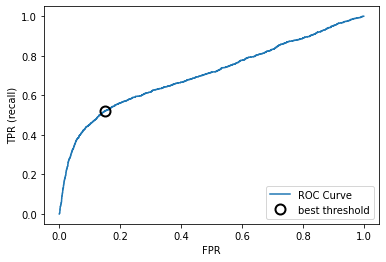

In [171]:
%matplotlib inline

lr_prob = grid_search_logistic.predict_proba(X_test)
lr_prob = lr_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, lr_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score 

In [43]:
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, logRegPred)))

f1 score logistic regression: 0.35


#### ROC_AUC Score

In [213]:
lr_prob = grid_search_logistic.predict_proba(X_test)
lr_prob = lr_prob[:,1]
rascore_lr = roc_auc_score(y_test, lr_prob)
print("ROC_AUC Score for Logistic Regression: {:.4f}".format(rascore_lr))

ROC_AUC Score for Logistic Regression: 0.7059


## Linear SVC

In [178]:
param_grid = {'C': [0.001,0.01,.1,1,10,100]}
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [216]:
grid_search_lsvc.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [217]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.80


In [218]:
print("Best train score: {:.4f}".format(grid_search_lsvc.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_lsvc.score(X_test,y_test)))

Best train score: 0.8023
Best test score: 0.8025


### Evaluation of Model

#### Confusion Matrix

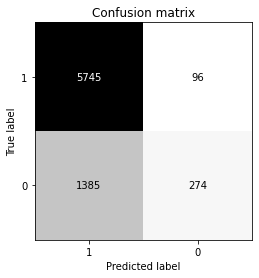

In [252]:
%matplotlib inline
lsvcPred = grid_search_lsvc.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, lsvcPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=-0.418477


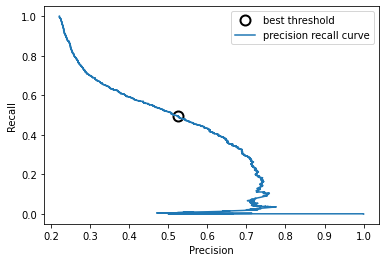

In [221]:
%matplotlib inline

lsvc_prob = grid_search_lsvc.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, lsvc_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=-0.430836


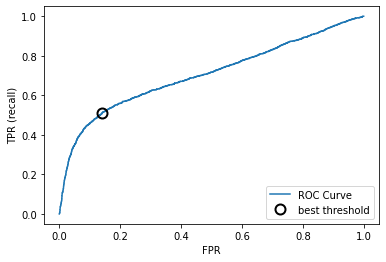

In [222]:
%matplotlib inline

lsvc_prob = grid_search_lsvc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, lsvc_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [223]:
print("f1 score Linear SVC: {:.4f}".format(f1_score(y_test, lsvcPred)))

f1 score Linear SVC: 0.2701


#### ROC_AUC Score

In [219]:
lsvc_prob = grid_search_lsvc.decision_function(X_test)
rascore_lsvc = roc_auc_score(y_test, lsvc_prob)
print("ROC_AUC Score for Linear SVC: {:.4f}".format(rascore_lsvc))

ROC_AUC Score for Linear SVC: 0.7062


## Decision Tree

In [179]:
param_grid = {'max_depth': range(1,20)}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [180]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

In [181]:
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.82


In [224]:
print("Best train score: {:.4f}".format(grid_search_dt.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_dt.score(X_test,y_test)))

Best train score: 0.8257
Best test score: 0.8173


### Evaluation of Model

#### Confusion Matrix

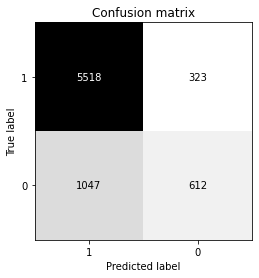

In [255]:
%matplotlib inline
dtPred = grid_search_dt.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, dtPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=0.245283


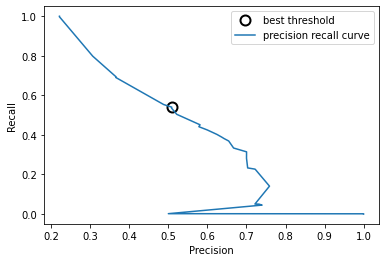

In [229]:
%matplotlib inline

dt_prob = grid_search_dt.predict_proba(X_test)
dt_prob = dt_prob[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, dt_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=0.245283


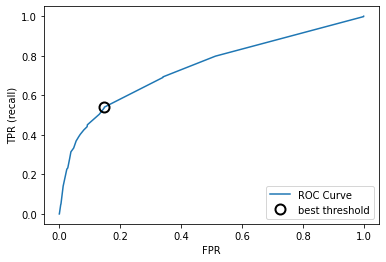

In [230]:
%matplotlib inline

dt_prob = grid_search_dt.predict_proba(X_test)
dt_prob = dt_prob[:,1]

fpr, tpr, thresholds = roc_curve(y_test, dt_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [232]:
print("f1 score Decision Tree: {:.4f}".format(f1_score(y_test, dtPred)))

f1 score Decision Tree: 0.4719


#### ROC_AUC Score

In [228]:
dt_prob = grid_search_dt.predict_proba(X_test)
dt_prob = dt_prob[:,1]
rascore_dt = roc_auc_score(y_test, dt_prob)
print("ROC_AUC Score for Decision Tree: {:.4f}".format(rascore_dt))

ROC_AUC Score for Decision Tree: 0.7393


 ## SVC with Linear Kernel

In [183]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_svcl = GridSearchCV(SVC(kernel="linear"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [184]:
grid_search_svcl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [185]:
print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.80


In [186]:
print("Best train score: {:.4f}".format(grid_search_svcl.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_svcl.score(X_test,y_test)))

Best train score: 0.8090
Best test score: 0.8109


### Evaluation of Model

#### Confusion Matrix

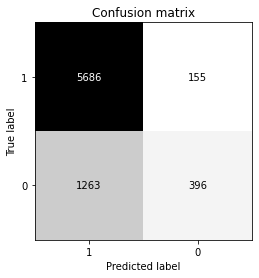

In [256]:
%matplotlib inline
svclPred = grid_search_svcl.predict(X_test)
dtPred = grid_search_dt.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, svclPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=-0.999371


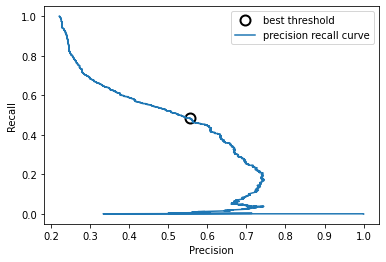

In [235]:
%matplotlib inline

svcl_prob = grid_search_svcl.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, svcl_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=-0.999783


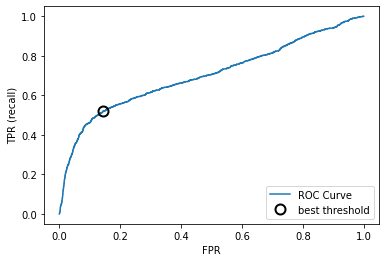

In [236]:
%matplotlib inline

svcl_prob = grid_search_svcl.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, svcl_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [237]:
print("f1 score SVC with Linear Kernel: {:.4f}".format(f1_score(y_test, svclPred)))

f1 score SVC with Linear Kernel: 0.3584


#### ROC_AUC Score

In [234]:
svcl_prob = grid_search_svcl.decision_function(X_test)
rascore_svcl = roc_auc_score(y_test, svcl_prob)
print("ROC_AUC Score for SVC with Linear Kernel: {:.4f}".format(rascore_svcl))

ROC_AUC Score for SVC with Linear Kernel: 0.7018


## SVC with RBF kernel

In [28]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [29]:
grid_search_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [30]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.82


In [31]:
print("Best train score: {:.4f}".format(grid_search_rbf.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_rbf.score(X_test,y_test)))

Best train score: 0.8216
Best test score: 0.8204


### Evaluation of Model

#### Confusion Matrix

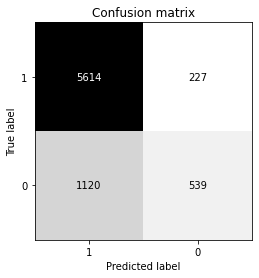

In [257]:
%matplotlib inline
rbfPred = grid_search_rbf.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, rbfPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

Best Threshold=-0.937640


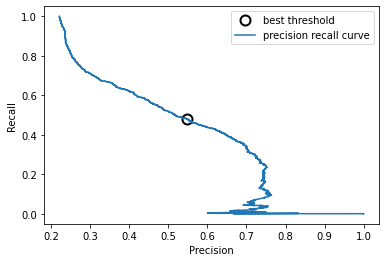

In [241]:
%matplotlib inline

rbf_prob = grid_search_rbf.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, rbf_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=-0.996096


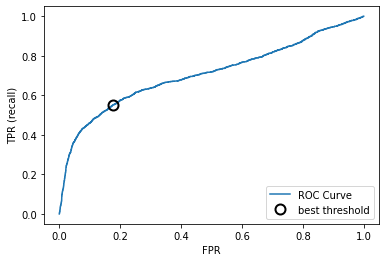

In [242]:
%matplotlib inline

rbf_prob = grid_search_rbf.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, rbf_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [243]:
print("f1 score SVC with RBF Kernel: {:.4f}".format(f1_score(y_test, rbfPred)))

f1 score SVC with RBF Kernel: 0.4445


#### ROC_AUC Score

In [240]:
rbf_prob = grid_search_rbf.decision_function(X_test)
rascore_rbf = roc_auc_score(y_test, rbf_prob)
print("ROC_AUC Score for SVC with RBF Kernel: {:.4f}".format(rascore_rbf))

ROC_AUC Score for SVC with RBF Kernel: 0.7080


## SVC with Poly Kernel 

In [295]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_poly = GridSearchCV(SVC(kernel="poly"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [296]:
grid_search_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [297]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.82


In [298]:
print("Best train score: {:.4f}".format(grid_search_poly.score(X_train,y_train)))
print("Best test score: {:.4f}".format(grid_search_poly.score(X_test,y_test)))

Best train score: 0.8231
Best test score: 0.8191


### Evaluation of Model

#### Confusion Matrix

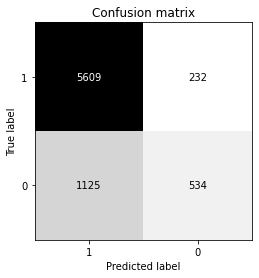

In [258]:
%matplotlib inline
polyPred = grid_search_poly.predict(X_test)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, polyPred), xlabel='Predicted label',
    ylabel='True label', xticklabels=credit.default_payment.unique(),
    yticklabels=credit.default_payment.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#### Precision Recall Curve

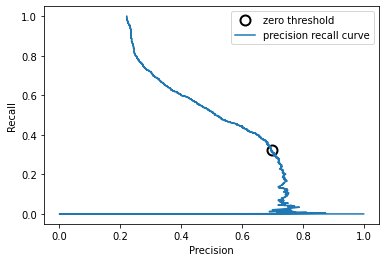

In [300]:
%matplotlib inline

poly_prob = grid_search_poly.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, poly_prob)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="zero threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#### ROC Curve

Best Threshold=-0.979905


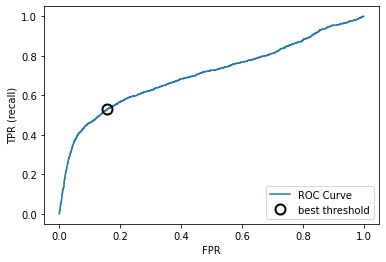

In [248]:
%matplotlib inline

poly_prob = grid_search_poly.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, poly_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

#### F1 Score

In [250]:
print("f1 score SVC with Poly Kernel: {:.4f}".format(f1_score(y_test, polyPred)))

f1 score SVC with Poly Kernel: 0.4404


#### ROC_AUC Score

In [201]:
poly_prob = grid_search_poly.decision_function(X_test)
rascore_poly = roc_auc_score(y_test, poly_prob)
print("ROC_AUC Score for SVC with Poly Kernel: {:.4f}".format(rascore_poly))

ROC_AUC Score for SVC with Poly Kernel: 0.7067


## Conclusion - Classification

### We have used Cross Validation Score, Confusion Matrix, F1 Score, Precision-Recall Curve, ROC curve and ROC_AUC Score to Evaluate the classification models. Since the target column has more negative values (0) than positive values (1) i.e. imbalance, ROC_AUC Score would be a good evaluation metric. 

### Decision Tree Classifier gives best ROC_AUC score of all models - 0.7393. Also, other evaluation metrics i.e. F1 Score and Cross Validation Score best for Decision Tree Classifier. Hence, we will choose this model for classification. 

### We get following train and test scores for Decision Tree Classifier (Depth 5) - Train Score = 0.8257 and Test Score = 0.8175.


## Running the model for final prediction

In [179]:
dt_classifier = DecisionTreeClassifier(max_depth = 5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [180]:
print("train score: {:.4f}".format(dt_classifier.score(X_train,y_train)))
print("test score: {:.4f}".format(dt_classifier.score(X_test,y_test)))

train score: 0.8257
test score: 0.8173


In [182]:
final_prediction_classification = dt_classifier.predict(X_test)

In [189]:
# Displaying first 100 values of predicted array
final_prediction_classification[:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

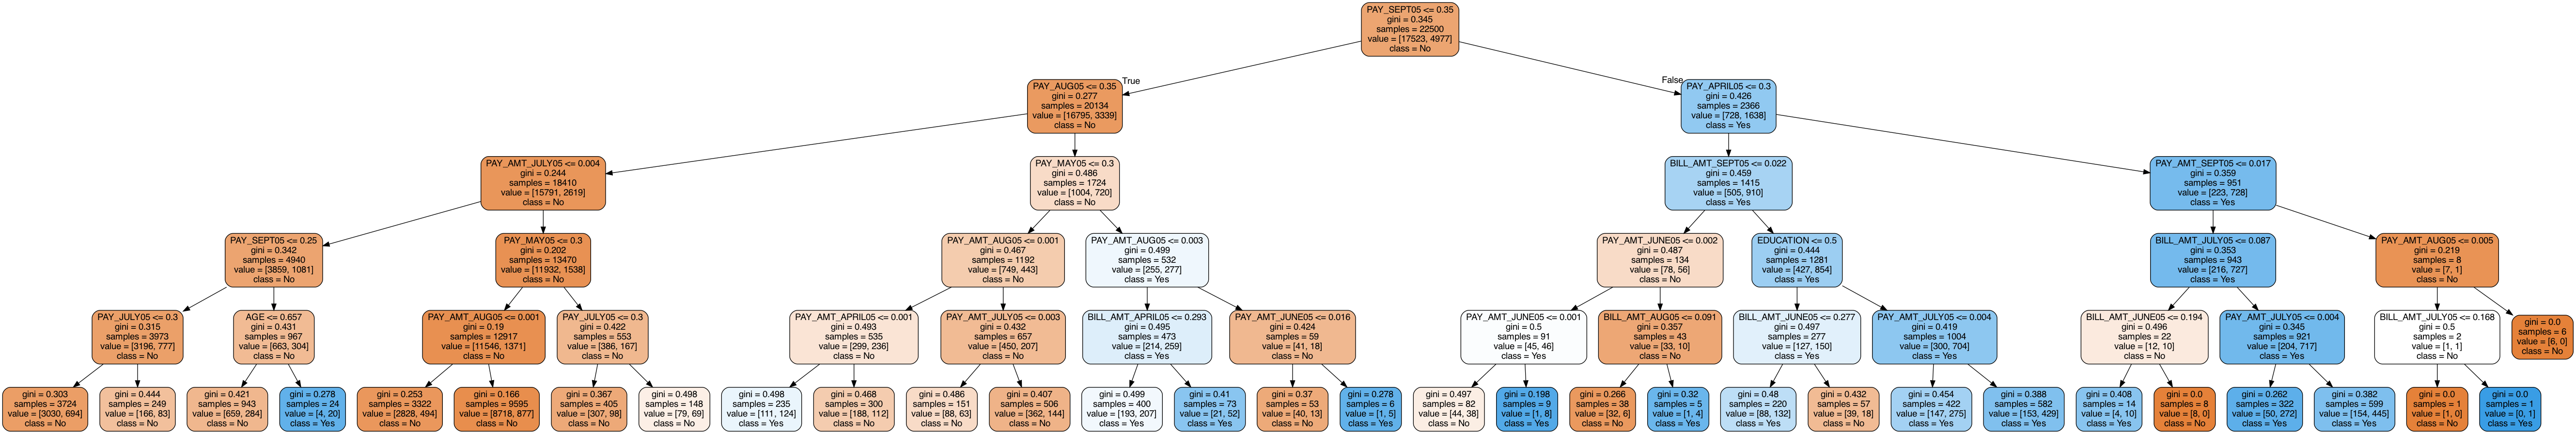

In [200]:
import os 
import graphviz
import pydotplus
from IPython.display import Image

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt_classifier, out_file=None, filled=True, rounded=True, feature_names = X.columns,
                          class_names = ["No","Yes"]) 
# Draw graph
#graph = graphviz.Source(dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data) 

# Show graph
Image(graph.create_png())